In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv('breast-cancer.csv')
data.head

<bound method NDFrame.head of      1000025  5   1  1.1  1.2  2 1.3   3  1.4  1.5  2.1
0    1002945  5   4    4    5  7  10   3    2    1    2
1    1015425  3   1    1    1  2   2   3    1    1    2
2    1016277  6   8    8    1  3   4   3    7    1    2
3    1017023  4   1    1    3  2   1   3    1    1    2
4    1017122  8  10   10    8  7  10   9    7    1    4
..       ... ..  ..  ...  ... ..  ..  ..  ...  ...  ...
693   776715  3   1    1    1  3   2   1    1    1    2
694   841769  2   1    1    1  2   1   1    1    1    2
695   888820  5  10   10    3  7   3   8   10    2    4
696   897471  4   8    6    4  3   4  10    6    1    4
697   897471  4   8    8    5  4   5  10    4    1    4

[698 rows x 11 columns]>

In [3]:
# Name of columns
col_names =  ['ID','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape',
                'Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin',
                'Normal Nucleoli','Mitoses','Class'
            ]

# setting the name of columns to the dataframe
data.columns = col_names

# Setting the index of dataframe to the ID of patints
data.set_index = data['ID']


# Looking for missing values
## data.isna()
#data.head


In [4]:
# Function for evaluating unique values of columns and their range.
def Unique_values(df,col):
    """
    It takes two arguments, the first one is the name of DataFrame
    and the second one is the name of column.
    It returns an f string with the data related to the uniqeness of
    that column values.
    
    """
    return f"|{col}| has {df[col].nunique()} unique values from {df[col].min()} to {df[col].max()}"

# iterating through column names and using Unique_values fuction.
for col in col_names:
    print(Unique_values(data,col))

|ID| has 644 unique values from 61634 to 13454352
|Clump Thickness| has 10 unique values from 1 to 10
|Uniformity of Cell Size| has 10 unique values from 1 to 10
|Uniformity of Cell Shape| has 10 unique values from 1 to 10
|Marginal Adhesion| has 10 unique values from 1 to 10
|Single Epithelial Cell Size| has 10 unique values from 1 to 10
|Bare Nuclei| has 11 unique values from 1 to ?
|Bland Chromatin| has 10 unique values from 1 to 10
|Normal Nucleoli| has 10 unique values from 1 to 10
|Mitoses| has 9 unique values from 1 to 10
|Class| has 2 unique values from 2 to 4


In [5]:
# Class column consists of two number 2 for benign tumor and 4 for malignant. We use a function to turn benign tumors
# to 0 and the malignant to 1.
def change_class(value):
    """
    takes the value of a column and return
    0 if the tumor is benign and 1 if the
    tumor is malignant.
    
    """
    if value == 2:
        return 0
    else:
        return 1
        
# Ussing apply method to rewrite the class column
data['Class']=data['Class'].apply(change_class)

In [6]:
data.reset_index()
data.drop('ID',axis=1,inplace=True)
data.drop('Marginal Adhesion',axis=1,inplace=True)
data.drop('Clump Thickness',axis=1,inplace=True)
data.drop('Uniformity of Cell Shape',axis=1,inplace=True)
data.drop('Bare Nuclei',axis=1,inplace=True)





In [7]:
data.sample(frac=1).reset_index(drop=True)


,Uniformity of Cell Size,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1,2,3,1,2,0
1,1,2,1,1,1,0
2,10,5,8,5,1,1
3,1,2,2,1,1,0
4,1,2,1,1,1,0
...,...,...,...,...,...,...
693,1,2,2,1,1,0
694,1,2,1,1,1,0
695,3,5,8,1,2,1
696,1,2,1,1,1,0


In [8]:
from sklearn.model_selection import train_test_split

train , test = train_test_split(data,test_size=0.1)
y_train , y_test = train.pop('Class') , test.pop('Class')
y_train , y_test = np.array(y_train) , np.array(y_test)
x_train , x_test = np.array(train),np.array(test)

In [9]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [10]:
print(f"Shape of x_train is {x_train.shape} | number of features: {x_train.shape[1]} | number of samples {x_train.shape[0]} ")
print(f"Shape of y_train is {y_train.shape}\n")

print(f"Shape of x_test is {x_test.shape} | number of features: {x_test.shape[1]} | number of samples {x_test.shape[0]} ")
print(f"Shape of y_test is {y_test.shape}\n")

Shape of x_train is (628, 5) | number of features: 5 | number of samples 628 
Shape of y_train is (628, 1)

Shape of x_test is (70, 5) | number of features: 5 | number of samples 70 
Shape of y_test is (70, 1)



In [68]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential

In [106]:
model = Sequential([
    Dense(8,activation='relu'),
    Dense(1,activation='sigmoid')
])


In [107]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')

In [108]:
history = model.fit(x_train,y_train,epochs=600,validation_split=0.2,verbose=2,batch_size=10)

Epoch 1/600
51/51 - 1s - loss: 2.4358 - accuracy: 0.6355 - val_loss: 2.0600 - val_accuracy: 0.6429 - 1s/epoch - 27ms/step
Epoch 2/600
51/51 - 0s - loss: 1.6371 - accuracy: 0.6394 - val_loss: 1.3209 - val_accuracy: 0.5079 - 212ms/epoch - 4ms/step
Epoch 3/600
51/51 - 0s - loss: 1.1317 - accuracy: 0.4861 - val_loss: 0.9378 - val_accuracy: 0.3492 - 206ms/epoch - 4ms/step
Epoch 4/600
51/51 - 0s - loss: 0.9050 - accuracy: 0.3546 - val_loss: 0.7999 - val_accuracy: 0.3492 - 202ms/epoch - 4ms/step
Epoch 5/600
51/51 - 0s - loss: 0.8065 - accuracy: 0.3765 - val_loss: 0.7361 - val_accuracy: 0.4365 - 213ms/epoch - 4ms/step
Epoch 6/600
51/51 - 0s - loss: 0.7460 - accuracy: 0.4064 - val_loss: 0.6826 - val_accuracy: 0.4762 - 205ms/epoch - 4ms/step
Epoch 7/600
51/51 - 0s - loss: 0.6957 - accuracy: 0.4920 - val_loss: 0.6366 - val_accuracy: 0.6587 - 209ms/epoch - 4ms/step
Epoch 8/600
51/51 - 0s - loss: 0.6518 - accuracy: 0.6195 - val_loss: 0.5968 - val_accuracy: 0.6746 - 206ms/epoch - 4ms/step
Epoch 9/60

Epoch 67/600
51/51 - 0s - loss: 0.1680 - accuracy: 0.9363 - val_loss: 0.1367 - val_accuracy: 0.9524 - 203ms/epoch - 4ms/step
Epoch 68/600
51/51 - 0s - loss: 0.1691 - accuracy: 0.9422 - val_loss: 0.1366 - val_accuracy: 0.9524 - 197ms/epoch - 4ms/step
Epoch 69/600
51/51 - 0s - loss: 0.1667 - accuracy: 0.9382 - val_loss: 0.1362 - val_accuracy: 0.9524 - 212ms/epoch - 4ms/step
Epoch 70/600
51/51 - 0s - loss: 0.1662 - accuracy: 0.9402 - val_loss: 0.1366 - val_accuracy: 0.9444 - 221ms/epoch - 4ms/step
Epoch 71/600
51/51 - 0s - loss: 0.1663 - accuracy: 0.9382 - val_loss: 0.1353 - val_accuracy: 0.9444 - 253ms/epoch - 5ms/step
Epoch 72/600
51/51 - 0s - loss: 0.1668 - accuracy: 0.9382 - val_loss: 0.1342 - val_accuracy: 0.9444 - 280ms/epoch - 5ms/step
Epoch 73/600
51/51 - 0s - loss: 0.1651 - accuracy: 0.9422 - val_loss: 0.1339 - val_accuracy: 0.9444 - 204ms/epoch - 4ms/step
Epoch 74/600
51/51 - 0s - loss: 0.1639 - accuracy: 0.9382 - val_loss: 0.1340 - val_accuracy: 0.9365 - 239ms/epoch - 5ms/step


Epoch 133/600
51/51 - 0s - loss: 0.1520 - accuracy: 0.9462 - val_loss: 0.1342 - val_accuracy: 0.9286 - 283ms/epoch - 6ms/step
Epoch 134/600
51/51 - 0s - loss: 0.1536 - accuracy: 0.9422 - val_loss: 0.1357 - val_accuracy: 0.9286 - 255ms/epoch - 5ms/step
Epoch 135/600
51/51 - 0s - loss: 0.1531 - accuracy: 0.9422 - val_loss: 0.1354 - val_accuracy: 0.9286 - 239ms/epoch - 5ms/step
Epoch 136/600
51/51 - 0s - loss: 0.1523 - accuracy: 0.9422 - val_loss: 0.1360 - val_accuracy: 0.9286 - 227ms/epoch - 4ms/step
Epoch 137/600
51/51 - 0s - loss: 0.1522 - accuracy: 0.9402 - val_loss: 0.1358 - val_accuracy: 0.9286 - 278ms/epoch - 5ms/step
Epoch 138/600
51/51 - 0s - loss: 0.1517 - accuracy: 0.9422 - val_loss: 0.1364 - val_accuracy: 0.9286 - 276ms/epoch - 5ms/step
Epoch 139/600
51/51 - 0s - loss: 0.1522 - accuracy: 0.9442 - val_loss: 0.1365 - val_accuracy: 0.9286 - 249ms/epoch - 5ms/step
Epoch 140/600
51/51 - 0s - loss: 0.1515 - accuracy: 0.9402 - val_loss: 0.1372 - val_accuracy: 0.9286 - 220ms/epoch - 4

Epoch 198/600
51/51 - 0s - loss: 0.1486 - accuracy: 0.9402 - val_loss: 0.1410 - val_accuracy: 0.9365 - 251ms/epoch - 5ms/step
Epoch 199/600
51/51 - 0s - loss: 0.1484 - accuracy: 0.9422 - val_loss: 0.1398 - val_accuracy: 0.9286 - 207ms/epoch - 4ms/step
Epoch 200/600
51/51 - 0s - loss: 0.1499 - accuracy: 0.9442 - val_loss: 0.1391 - val_accuracy: 0.9286 - 192ms/epoch - 4ms/step
Epoch 201/600
51/51 - 0s - loss: 0.1506 - accuracy: 0.9422 - val_loss: 0.1366 - val_accuracy: 0.9286 - 187ms/epoch - 4ms/step
Epoch 202/600
51/51 - 0s - loss: 0.1514 - accuracy: 0.9462 - val_loss: 0.1397 - val_accuracy: 0.9365 - 278ms/epoch - 5ms/step
Epoch 203/600
51/51 - 0s - loss: 0.1495 - accuracy: 0.9462 - val_loss: 0.1391 - val_accuracy: 0.9286 - 185ms/epoch - 4ms/step
Epoch 204/600
51/51 - 0s - loss: 0.1495 - accuracy: 0.9462 - val_loss: 0.1396 - val_accuracy: 0.9286 - 189ms/epoch - 4ms/step
Epoch 205/600
51/51 - 0s - loss: 0.1494 - accuracy: 0.9462 - val_loss: 0.1405 - val_accuracy: 0.9286 - 187ms/epoch - 4

51/51 - 0s - loss: 0.1458 - accuracy: 0.9442 - val_loss: 0.1413 - val_accuracy: 0.9365 - 190ms/epoch - 4ms/step
Epoch 264/600
51/51 - 0s - loss: 0.1464 - accuracy: 0.9502 - val_loss: 0.1390 - val_accuracy: 0.9365 - 213ms/epoch - 4ms/step
Epoch 265/600
51/51 - 0s - loss: 0.1458 - accuracy: 0.9482 - val_loss: 0.1412 - val_accuracy: 0.9365 - 321ms/epoch - 6ms/step
Epoch 266/600
51/51 - 0s - loss: 0.1460 - accuracy: 0.9422 - val_loss: 0.1393 - val_accuracy: 0.9365 - 268ms/epoch - 5ms/step
Epoch 267/600
51/51 - 0s - loss: 0.1452 - accuracy: 0.9442 - val_loss: 0.1395 - val_accuracy: 0.9365 - 260ms/epoch - 5ms/step
Epoch 268/600
51/51 - 0s - loss: 0.1472 - accuracy: 0.9502 - val_loss: 0.1400 - val_accuracy: 0.9365 - 215ms/epoch - 4ms/step
Epoch 269/600
51/51 - 0s - loss: 0.1456 - accuracy: 0.9522 - val_loss: 0.1412 - val_accuracy: 0.9365 - 338ms/epoch - 7ms/step
Epoch 270/600
51/51 - 0s - loss: 0.1452 - accuracy: 0.9442 - val_loss: 0.1397 - val_accuracy: 0.9365 - 333ms/epoch - 7ms/step
Epoch 

Epoch 329/600
51/51 - 0s - loss: 0.1429 - accuracy: 0.9442 - val_loss: 0.1419 - val_accuracy: 0.9365 - 194ms/epoch - 4ms/step
Epoch 330/600
51/51 - 0s - loss: 0.1429 - accuracy: 0.9462 - val_loss: 0.1429 - val_accuracy: 0.9365 - 199ms/epoch - 4ms/step
Epoch 331/600
51/51 - 0s - loss: 0.1425 - accuracy: 0.9522 - val_loss: 0.1431 - val_accuracy: 0.9365 - 194ms/epoch - 4ms/step
Epoch 332/600
51/51 - 0s - loss: 0.1423 - accuracy: 0.9462 - val_loss: 0.1426 - val_accuracy: 0.9365 - 197ms/epoch - 4ms/step
Epoch 333/600
51/51 - 0s - loss: 0.1423 - accuracy: 0.9482 - val_loss: 0.1428 - val_accuracy: 0.9365 - 193ms/epoch - 4ms/step
Epoch 334/600
51/51 - 0s - loss: 0.1445 - accuracy: 0.9462 - val_loss: 0.1458 - val_accuracy: 0.9286 - 190ms/epoch - 4ms/step
Epoch 335/600
51/51 - 0s - loss: 0.1420 - accuracy: 0.9482 - val_loss: 0.1435 - val_accuracy: 0.9365 - 193ms/epoch - 4ms/step
Epoch 336/600
51/51 - 0s - loss: 0.1427 - accuracy: 0.9482 - val_loss: 0.1431 - val_accuracy: 0.9365 - 195ms/epoch - 4

51/51 - 0s - loss: 0.1406 - accuracy: 0.9522 - val_loss: 0.1433 - val_accuracy: 0.9365 - 194ms/epoch - 4ms/step
Epoch 395/600
51/51 - 0s - loss: 0.1397 - accuracy: 0.9502 - val_loss: 0.1425 - val_accuracy: 0.9365 - 192ms/epoch - 4ms/step
Epoch 396/600
51/51 - 0s - loss: 0.1421 - accuracy: 0.9522 - val_loss: 0.1424 - val_accuracy: 0.9365 - 195ms/epoch - 4ms/step
Epoch 397/600
51/51 - 0s - loss: 0.1412 - accuracy: 0.9462 - val_loss: 0.1428 - val_accuracy: 0.9365 - 198ms/epoch - 4ms/step
Epoch 398/600
51/51 - 0s - loss: 0.1414 - accuracy: 0.9482 - val_loss: 0.1446 - val_accuracy: 0.9286 - 197ms/epoch - 4ms/step
Epoch 399/600
51/51 - 0s - loss: 0.1398 - accuracy: 0.9502 - val_loss: 0.1435 - val_accuracy: 0.9286 - 195ms/epoch - 4ms/step
Epoch 400/600
51/51 - 0s - loss: 0.1398 - accuracy: 0.9482 - val_loss: 0.1443 - val_accuracy: 0.9286 - 192ms/epoch - 4ms/step
Epoch 401/600
51/51 - 0s - loss: 0.1405 - accuracy: 0.9522 - val_loss: 0.1446 - val_accuracy: 0.9286 - 193ms/epoch - 4ms/step
Epoch 

Epoch 460/600
51/51 - 0s - loss: 0.1392 - accuracy: 0.9522 - val_loss: 0.1444 - val_accuracy: 0.9286 - 192ms/epoch - 4ms/step
Epoch 461/600
51/51 - 0s - loss: 0.1385 - accuracy: 0.9522 - val_loss: 0.1430 - val_accuracy: 0.9365 - 196ms/epoch - 4ms/step
Epoch 462/600
51/51 - 0s - loss: 0.1397 - accuracy: 0.9442 - val_loss: 0.1453 - val_accuracy: 0.9286 - 199ms/epoch - 4ms/step
Epoch 463/600
51/51 - 0s - loss: 0.1397 - accuracy: 0.9522 - val_loss: 0.1441 - val_accuracy: 0.9365 - 192ms/epoch - 4ms/step
Epoch 464/600
51/51 - 0s - loss: 0.1391 - accuracy: 0.9522 - val_loss: 0.1447 - val_accuracy: 0.9286 - 195ms/epoch - 4ms/step
Epoch 465/600
51/51 - 0s - loss: 0.1380 - accuracy: 0.9522 - val_loss: 0.1442 - val_accuracy: 0.9286 - 192ms/epoch - 4ms/step
Epoch 466/600
51/51 - 0s - loss: 0.1394 - accuracy: 0.9482 - val_loss: 0.1450 - val_accuracy: 0.9286 - 190ms/epoch - 4ms/step
Epoch 467/600
51/51 - 0s - loss: 0.1392 - accuracy: 0.9482 - val_loss: 0.1447 - val_accuracy: 0.9365 - 191ms/epoch - 4

51/51 - 0s - loss: 0.1366 - accuracy: 0.9562 - val_loss: 0.1459 - val_accuracy: 0.9286 - 191ms/epoch - 4ms/step
Epoch 526/600
51/51 - 0s - loss: 0.1380 - accuracy: 0.9542 - val_loss: 0.1453 - val_accuracy: 0.9365 - 188ms/epoch - 4ms/step
Epoch 527/600
51/51 - 0s - loss: 0.1392 - accuracy: 0.9522 - val_loss: 0.1447 - val_accuracy: 0.9365 - 200ms/epoch - 4ms/step
Epoch 528/600
51/51 - 0s - loss: 0.1385 - accuracy: 0.9502 - val_loss: 0.1454 - val_accuracy: 0.9286 - 188ms/epoch - 4ms/step
Epoch 529/600
51/51 - 0s - loss: 0.1377 - accuracy: 0.9542 - val_loss: 0.1449 - val_accuracy: 0.9286 - 190ms/epoch - 4ms/step
Epoch 530/600
51/51 - 0s - loss: 0.1372 - accuracy: 0.9522 - val_loss: 0.1452 - val_accuracy: 0.9286 - 191ms/epoch - 4ms/step
Epoch 531/600
51/51 - 0s - loss: 0.1373 - accuracy: 0.9502 - val_loss: 0.1459 - val_accuracy: 0.9286 - 197ms/epoch - 4ms/step
Epoch 532/600
51/51 - 0s - loss: 0.1384 - accuracy: 0.9542 - val_loss: 0.1449 - val_accuracy: 0.9365 - 202ms/epoch - 4ms/step
Epoch 

Epoch 591/600
51/51 - 0s - loss: 0.1355 - accuracy: 0.9522 - val_loss: 0.1440 - val_accuracy: 0.9286 - 210ms/epoch - 4ms/step
Epoch 592/600
51/51 - 0s - loss: 0.1368 - accuracy: 0.9522 - val_loss: 0.1442 - val_accuracy: 0.9286 - 196ms/epoch - 4ms/step
Epoch 593/600
51/51 - 0s - loss: 0.1351 - accuracy: 0.9522 - val_loss: 0.1434 - val_accuracy: 0.9286 - 194ms/epoch - 4ms/step
Epoch 594/600
51/51 - 0s - loss: 0.1386 - accuracy: 0.9522 - val_loss: 0.1433 - val_accuracy: 0.9286 - 192ms/epoch - 4ms/step
Epoch 595/600
51/51 - 0s - loss: 0.1359 - accuracy: 0.9522 - val_loss: 0.1436 - val_accuracy: 0.9286 - 196ms/epoch - 4ms/step
Epoch 596/600
51/51 - 0s - loss: 0.1378 - accuracy: 0.9542 - val_loss: 0.1424 - val_accuracy: 0.9365 - 200ms/epoch - 4ms/step
Epoch 597/600
51/51 - 0s - loss: 0.1372 - accuracy: 0.9522 - val_loss: 0.1440 - val_accuracy: 0.9286 - 198ms/epoch - 4ms/step
Epoch 598/600
51/51 - 0s - loss: 0.1381 - accuracy: 0.9482 - val_loss: 0.1429 - val_accuracy: 0.9286 - 194ms/epoch - 4

In [109]:
model.evaluate(x_test,y_test)

3/3 [==============================] - 0s 4ms/step - loss: 0.1084 - accuracy: 0.9571


[0.10836433619260788, 0.9571428298950195]

In [87]:
history.history['epoch']

KeyError: 'epoch'

In [110]:
train_loss , val_loss = history.history['loss'] , history.history['val_loss']
train_acc , val_acc = history.history['accuracy'] , history.history['val_accuracy']
epochs = range(1,601)

Text(0.5, 1.0, 'Accuracy-epochs')

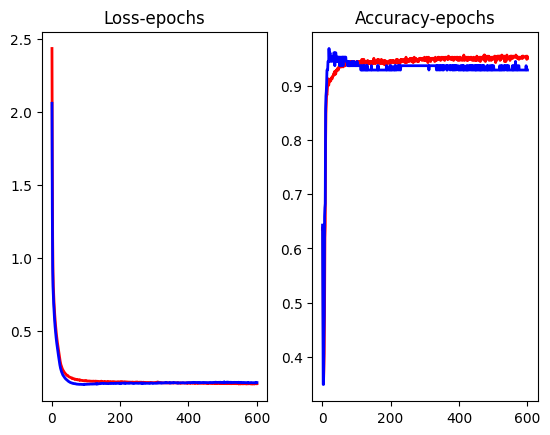

In [111]:
fig , axes = plt.subplots(nrows=1,ncols=2)

axes[0].plot(epochs,train_loss,label='Loss-epochs Train',color='r',lw=2)
axes[0].plot(epochs,val_loss,label='Loss-epochs Validation',color='b',lw=2)
axes[0].set_title('Loss-epochs')

axes[1].plot(epochs,train_acc,label='accuracy-epochs Train',color='r',lw=2)
axes[1].plot(epochs,val_acc,label='accuracy-epochs Validation',color='b',lw=2)
axes[1].set_title('Accuracy-epochs')


In [113]:
model.predict(np.array([[1,8,5,1,1]]))

1/1 [==============================] - 0s 25ms/step


array([[0.56804276]], dtype=float32)